# Python for data analysis project: detection of spam emails
### Pierre Le Lay, DIA2 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np

In [2]:
%autosave 60

Autosaving every 60 seconds


## Import spam data

We import the data (spambase.data file) by setting the header to None as the file doesn't contain a first row with names of the attributes. 

In [3]:
spambase = pd.read_table("spambase.data",sep=',', header=None)
spambase

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,57
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.000,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.010,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,0.00,...,0.000,0.232,0.0,0.000,0.000,0.000,1.142,3,88,0
4597,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.353,0.000,0.000,1.555,4,14,0
4598,0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.102,0.718,0.0,0.000,0.000,0.000,1.404,6,118,0
4599,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.057,0.0,0.000,0.000,0.000,1.147,5,78,0


The data has been imported but the features are not named. Let's remedy that by adding them from the 'spambase.names' file provided by the researchers behind the dataset. 

First, here is the 'spambase.names' file to better understand the code below. 

In [4]:
doc_names = open("spambase.names")
content = doc_names.read()
print(content)
doc_names.close()

| SPAM E-MAIL DATABASE ATTRIBUTES (in .names format)
|
| 48 continuous real [0,100] attributes of type word_freq_WORD 
| = percentage of words in the e-mail that match WORD,
| i.e. 100 * (number of times the WORD appears in the e-mail) / 
| total number of words in e-mail.  A "word" in this case is any 
| string of alphanumeric characters bounded by non-alphanumeric 
| characters or end-of-string.
|
| 6 continuous real [0,100] attributes of type char_freq_CHAR
| = percentage of characters in the e-mail that match CHAR,
| i.e. 100 * (number of CHAR occurences) / total characters in e-mail
|
| 1 continuous real [1,...] attribute of type capital_run_length_average
| = average length of uninterrupted sequences of capital letters
|
| 1 continuous integer [1,...] attribute of type capital_run_length_longest
| = length of longest uninterrupted sequence of capital letters
|
| 1 continuous integer [1,...] attribute of type capital_run_length_total
| = sum of length of uninterrupted sequences of

In [5]:
# function to get the feature names from the spambase.names file
def get_names():
    names = open("spambase.names")
    feature_names=[]
    line = names.readline()
    while "classes" not in line:
    # in spambase.names the line with 'classes' is the last before the feature names
        line = names. readline()
    line=names.readline()  # for the blank line before the feature names
    while(line): 
        # until end of file collect the feature names
        line=names.readline()
        feature_names.append(line.split(':')[0])
    feature_names[len(feature_names)-1] = "spam"  
    # to replace the last empty line of spambase.names captured as '' in feature_names 
    # by the class attribute 'spam' (1 or 0)
    names.close()
    return feature_names

In [6]:
feature_names = get_names()
feature_names

['word_freq_make',
 'word_freq_address',
 'word_freq_all',
 'word_freq_3d',
 'word_freq_our',
 'word_freq_over',
 'word_freq_remove',
 'word_freq_internet',
 'word_freq_order',
 'word_freq_mail',
 'word_freq_receive',
 'word_freq_will',
 'word_freq_people',
 'word_freq_report',
 'word_freq_addresses',
 'word_freq_free',
 'word_freq_business',
 'word_freq_email',
 'word_freq_you',
 'word_freq_credit',
 'word_freq_your',
 'word_freq_font',
 'word_freq_000',
 'word_freq_money',
 'word_freq_hp',
 'word_freq_hpl',
 'word_freq_george',
 'word_freq_650',
 'word_freq_lab',
 'word_freq_labs',
 'word_freq_telnet',
 'word_freq_857',
 'word_freq_data',
 'word_freq_415',
 'word_freq_85',
 'word_freq_technology',
 'word_freq_1999',
 'word_freq_parts',
 'word_freq_pm',
 'word_freq_direct',
 'word_freq_cs',
 'word_freq_meeting',
 'word_freq_original',
 'word_freq_project',
 'word_freq_re',
 'word_freq_edu',
 'word_freq_table',
 'word_freq_conference',
 'char_freq_;',
 'char_freq_(',
 'char_freq_[',
 '

In [7]:
len(feature_names)
# we have the correct number of variables : 58 (predictors + target)

58

We now add the feature names to the dataframe.

In [8]:
spambase.columns = feature_names
spambase

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.000,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.010,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,0.00,...,0.000,0.232,0.0,0.000,0.000,0.000,1.142,3,88,0
4597,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.353,0.000,0.000,1.555,4,14,0
4598,0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.102,0.718,0.0,0.000,0.000,0.000,1.404,6,118,0
4599,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.057,0.0,0.000,0.000,0.000,1.147,5,78,0


In [9]:
spambase.shape

(4601, 58)

Our dataframe contains 58 variables and 4601 individuals which is consistent with the documentation provided. It seems we have correctly imported our data. 

## Spam data analysis 
Now that we have the dataset correctly imported, let's explore and get to know it. 

### Missing values

In [10]:
spambase.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 58 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   word_freq_make              4601 non-null   float64
 1   word_freq_address           4601 non-null   float64
 2   word_freq_all               4601 non-null   float64
 3   word_freq_3d                4601 non-null   float64
 4   word_freq_our               4601 non-null   float64
 5   word_freq_over              4601 non-null   float64
 6   word_freq_remove            4601 non-null   float64
 7   word_freq_internet          4601 non-null   float64
 8   word_freq_order             4601 non-null   float64
 9   word_freq_mail              4601 non-null   float64
 10  word_freq_receive           4601 non-null   float64
 11  word_freq_will              4601 non-null   float64
 12  word_freq_people            4601 non-null   float64
 13  word_freq_report            4601 

In [11]:
spambase.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


From the previsous commands on spambase we know that no value is null in our dataset. And all but three variables are of type float, the last remaining being of type int, including the target variable. 

In [12]:
# We can still verify by ourselves if there are missing values detected by pandas. 
spambase.isnull().any()
# and we can see that there are none.

word_freq_make                False
word_freq_address             False
word_freq_all                 False
word_freq_3d                  False
word_freq_our                 False
word_freq_over                False
word_freq_remove              False
word_freq_internet            False
word_freq_order               False
word_freq_mail                False
word_freq_receive             False
word_freq_will                False
word_freq_people              False
word_freq_report              False
word_freq_addresses           False
word_freq_free                False
word_freq_business            False
word_freq_email               False
word_freq_you                 False
word_freq_credit              False
word_freq_your                False
word_freq_font                False
word_freq_000                 False
word_freq_money               False
word_freq_hp                  False
word_freq_hpl                 False
word_freq_george              False
word_freq_650               

In [13]:
# or in a visually simpler way:
spambase.isnull().any().sum()

0

### We can go a step further to check for missing values and look for the ones pandas might not be able to detect. 

In [14]:
missing_values = ["na","n/a","NA","nan","NaN",""," "]

In [15]:
df = pd.read_table("spambase.data",sep=',',na_values=missing_values,header=None)
df

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,57
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.000,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.010,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,0.00,...,0.000,0.232,0.0,0.000,0.000,0.000,1.142,3,88,0
4597,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.353,0.000,0.000,1.555,4,14,0
4598,0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.102,0.718,0.0,0.000,0.000,0.000,1.404,6,118,0
4599,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.057,0.0,0.000,0.000,0.000,1.147,5,78,0


In [16]:
# Check for missing values with the additional possibilities.
df.isnull().any()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
32    False
33    False
34    False
35    False
36    False
37    False
38    False
39    False
40    False
41    False
42    False
43    False
44    False
45    False
46    False
47    False
48    False
49    False
50    False
51    False
52    False
53    False
54    False
55    False
56    False
57    False
dtype: bool

In [17]:
# Check for missing values in a visually simpler way
df.isnull().any().sum()

0

### Data exploration and analysis
We want to understand our dataset and look for a connection between the predictors and the target. Are some features more important than others in predicting the nature of the emails?

In [18]:
spambase.describe().T

,count,mean,std,min,25%,50%,75%,max
word_freq_make,4601.0,0.104553,0.305358,0.0,0.000,0.000,0.000,4.540
word_freq_address,4601.0,0.213015,1.290575,0.0,0.000,0.000,0.000,14.280
word_freq_all,4601.0,0.280656,0.504143,0.0,0.000,0.000,0.420,5.100
word_freq_3d,4601.0,0.065425,1.395151,0.0,0.000,0.000,0.000,42.810
word_freq_our,4601.0,0.312223,0.672513,0.0,0.000,0.000,0.380,10.000
word_freq_over,4601.0,0.095901,0.273824,0.0,0.000,0.000,0.000,5.880
word_freq_remove,4601.0,0.114208,0.391441,0.0,0.000,0.000,0.000,7.270
word_freq_internet,4601.0,0.105295,0.401071,0.0,0.000,0.000,0.000,11.110
word_freq_order,4601.0,0.090067,0.278616,0.0,0.000,0.000,0.000,5.260
word_freq_mail,4601.0,0.239413,0.644755,0.0,0.000,0.000,0.160,18.180


#### Looking at the range and mean of each variable, we wonder whether we should normalize or standardize the data.

#### How is our data distributed between each class?

In [19]:
spam_qty = spambase[spambase.spam==1].spam.size
spam_qty

1813

In [20]:
non_spam_qty = spambase[spambase.spam==0].spam.size
non_spam_qty

2788

In [21]:
spam_prop = spam_qty/(spam_qty + non_spam_qty)
spam_prop

0.39404477287546186

We have about 39.40% of our data categorized as spam, and therefore about 60.60% of non-spam individuals. 

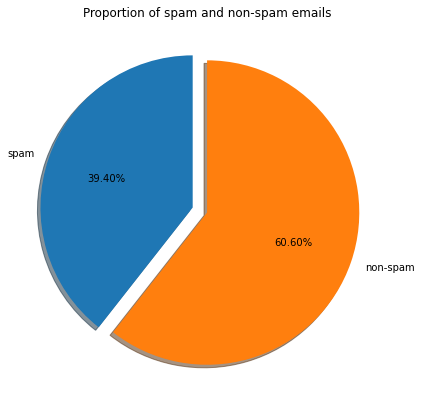

In [22]:
# let's visualise those proportions 
portions = [spam_qty, non_spam_qty]  # the proportions of spam and non-spam to display
labels = ["spam", "non-spam"]
plt.figure(figsize=(7,7))
plt.pie(portions, startangle=90, labels=labels, autopct='%1.2f%%', shadow=True, explode=[0.1,0])
plt.title("Proportion of spam and non-spam emails")

# Just for to get white labels for the slides
#_, texts, autotexts = plt.pie(portions, startangle=90, labels=labels, autopct='%1.2f%%', shadow=True, explode=[0.1,0])
#for text in texts:
#    text.set_color('white')
#for autotext in autotexts:
#    autotext.set_color('white')

plt.show()

#### How does the imbalance of our dataset might impact our analysis and use of the dataset? We will see later that we can use specific tools when building models of prediction to ensure that these models are not overtrained on one class and undertrained on the other, and that their performance is correctly measured in a way that takes that imbalance into account. 

#### We now want to know the most frequent words and characters for spam and non-spam emails to start looking for a connection between features and target. 
In the following section, when I refer to frequencies, I mean frequency for all 'word_freq_' and 'char_freq_' features and count for the three 'capital_run_length_' features. 

In [23]:
# The average frequencies of the variables for each target class. 
table_spam = pd.pivot_table(spambase, columns='spam',aggfunc='mean')
table_spam

spam,0,1
capital_run_length_average,2.377301,9.519165
capital_run_length_longest,18.214491,104.393271
capital_run_length_total,161.470947,470.619415
char_freq_!,0.109984,0.513713
char_freq_#,0.021713,0.078877
char_freq_$,0.011648,0.174478
char_freq_(,0.158578,0.108970
char_freq_;,0.050281,0.020573
char_freq_[,0.022684,0.008199
word_freq_000,0.007088,0.247055


In [24]:
# The most frequent words and characters on average 
spambase.mean().sort_values(ascending=False)

capital_run_length_total      283.289285
capital_run_length_longest     52.172789
capital_run_length_average      5.191515
word_freq_you                   1.662100
word_freq_your                  0.809761
word_freq_george                0.767305
word_freq_hp                    0.549504
word_freq_will                  0.541702
spam                            0.394045
word_freq_our                   0.312223
word_freq_re                    0.301224
word_freq_all                   0.280656
char_freq_!                     0.269071
word_freq_hpl                   0.265384
word_freq_free                  0.248848
word_freq_mail                  0.239413
word_freq_address               0.213015
word_freq_email                 0.184745
word_freq_edu                   0.179824
word_freq_business              0.142586
char_freq_(                     0.139030
word_freq_1999                  0.136953
word_freq_meeting               0.132339
word_freq_650                   0.124845
word_freq_font  

In [25]:
# The most frequent words and characters on average in the spam category
spambase[spambase.spam==1].mean().sort_values(ascending=False)

capital_run_length_total      470.619415
capital_run_length_longest    104.393271
capital_run_length_average      9.519165
word_freq_you                   2.264539
word_freq_your                  1.380370
spam                            1.000000
word_freq_will                  0.549972
word_freq_free                  0.518362
word_freq_our                   0.513955
char_freq_!                     0.513713
word_freq_all                   0.403795
word_freq_mail                  0.350507
word_freq_email                 0.319228
word_freq_business              0.287507
word_freq_remove                0.275405
word_freq_000                   0.247055
word_freq_font                  0.238036
word_freq_money                 0.212879
word_freq_internet              0.208141
word_freq_credit                0.205521
word_freq_over                  0.174876
char_freq_$                     0.174478
word_freq_order                 0.170061
word_freq_3d                    0.164672
word_freq_addres

In [26]:
# Most frequent words and characters on average for the non-spam category
spambase[spambase.spam==0].mean().sort_values(ascending=False)

capital_run_length_total      161.470947
capital_run_length_longest     18.214491
capital_run_length_average      2.377301
word_freq_you                   1.270341
word_freq_george                1.265265
word_freq_hp                    0.895473
word_freq_will                  0.536324
word_freq_your                  0.438702
word_freq_hpl                   0.431994
word_freq_re                    0.415760
word_freq_edu                   0.287184
word_freq_address               0.244466
word_freq_meeting               0.216808
word_freq_all                   0.200581
word_freq_1999                  0.197744
word_freq_650                   0.193806
word_freq_our                   0.181040
word_freq_85                    0.169455
word_freq_mail                  0.167170
word_freq_labs                  0.165854
word_freq_lab                   0.162794
char_freq_(                     0.158578
word_freq_data                  0.150986
word_freq_technology            0.141671
word_freq_projec

In [27]:
# Max frequencies for the spam emails 
spambase[spambase.spam==1].max().sort_values(ascending=False)

capital_run_length_total      15841.000
capital_run_length_longest     9989.000
capital_run_length_average     1102.500
word_freq_3d                     42.810
char_freq_#                      19.829
word_freq_credit                 18.180
word_freq_font                   17.100
word_freq_free                   16.660
word_freq_money                  12.500
word_freq_you                    12.500
word_freq_internet               11.110
word_freq_your                   11.110
char_freq_(                       9.752
word_freq_650                     9.090
word_freq_email                   9.090
char_freq_!                       7.843
word_freq_our                     7.690
word_freq_mail                    7.550
word_freq_remove                  7.270
word_freq_business                7.140
word_freq_will                    6.250
char_freq_$                       6.003
word_freq_re                      5.550
word_freq_people                  5.550
word_freq_000                     5.450


In [28]:
# Max frequencies for the non-spam emails
spambase[spambase.spam==0].max().sort_values(ascending=False)

capital_run_length_total      5902.000
capital_run_length_longest    1488.000
capital_run_length_average     251.000
word_freq_george                33.330
char_freq_!                     32.478
word_freq_edu                   22.050
word_freq_re                    21.420
word_freq_hp                    20.830
word_freq_free                  20.000
word_freq_project               20.000
word_freq_85                    20.000
word_freq_you                   18.750
word_freq_data                  18.180
word_freq_mail                  18.180
word_freq_hpl                   16.660
word_freq_meeting               14.280
word_freq_address               14.280
word_freq_lab                   14.280
word_freq_telnet                12.500
word_freq_font                  11.420
word_freq_pm                    11.110
word_freq_your                  10.710
word_freq_report                10.000
word_freq_our                   10.000
word_freq_conference            10.000
word_freq_money          

#### The results above inform us on some words and characters more frequent than others in each class. It would be interesting to know how much more present each of those words and characters is in one class compared to the other. Let's find out. 

In [29]:
# We separate the original dataset into spam and non-spam data
spambase_0 = spambase[spambase.spam==0]  
spambase_1 = spambase[spambase.spam==1]

Each class sorted by most frequent features

In [30]:
spambase_0.mean().sort_values(ascending=False)

capital_run_length_total      161.470947
capital_run_length_longest     18.214491
capital_run_length_average      2.377301
word_freq_you                   1.270341
word_freq_george                1.265265
word_freq_hp                    0.895473
word_freq_will                  0.536324
word_freq_your                  0.438702
word_freq_hpl                   0.431994
word_freq_re                    0.415760
word_freq_edu                   0.287184
word_freq_address               0.244466
word_freq_meeting               0.216808
word_freq_all                   0.200581
word_freq_1999                  0.197744
word_freq_650                   0.193806
word_freq_our                   0.181040
word_freq_85                    0.169455
word_freq_mail                  0.167170
word_freq_labs                  0.165854
word_freq_lab                   0.162794
char_freq_(                     0.158578
word_freq_data                  0.150986
word_freq_technology            0.141671
word_freq_projec

In [31]:
spambase_1.mean().sort_values(ascending=False)

capital_run_length_total      470.619415
capital_run_length_longest    104.393271
capital_run_length_average      9.519165
word_freq_you                   2.264539
word_freq_your                  1.380370
spam                            1.000000
word_freq_will                  0.549972
word_freq_free                  0.518362
word_freq_our                   0.513955
char_freq_!                     0.513713
word_freq_all                   0.403795
word_freq_mail                  0.350507
word_freq_email                 0.319228
word_freq_business              0.287507
word_freq_remove                0.275405
word_freq_000                   0.247055
word_freq_font                  0.238036
word_freq_money                 0.212879
word_freq_internet              0.208141
word_freq_credit                0.205521
word_freq_over                  0.174876
char_freq_$                     0.174478
word_freq_order                 0.170061
word_freq_3d                    0.164672
word_freq_addres

###### In spam data, how much more frequent are the most frequent words and characters compared to non-spam data?

In [32]:
spambase_prop_1 = spambase_1.mean()/spambase_0.mean()
spambase_prop_1.drop(index='spam',inplace=True)  # we don't need the target
spambase_prop_1.sort_values(ascending=False)

word_freq_3d                  185.872477
word_freq_000                  34.857704
word_freq_remove               29.351310
word_freq_credit               27.117520
char_freq_$                    14.978608
word_freq_addresses            13.474663
word_freq_money                12.421667
word_freq_free                  7.044223
word_freq_business              5.946800
capital_run_length_longest      5.731331
word_freq_receive               5.455026
word_freq_internet              5.418279
word_freq_font                  5.263268
char_freq_!                     4.670815
word_freq_order                 4.469543
capital_run_length_average      4.004190
word_freq_over                  3.925872
char_freq_#                     3.632699
word_freq_email                 3.281132
word_freq_your                  3.146489
capital_run_length_total        2.914576
word_freq_our                   2.838899
word_freq_people                2.327873
word_freq_mail                  2.096712
word_freq_make  

In [33]:
spambase_maxprop_1 = spambase_1.max()/spambase_0.max()
spambase_maxprop_1.sort_values(ascending=False)

spam                                inf
word_freq_3d                  49.206897
word_freq_credit               6.733333
capital_run_length_longest     6.713038
capital_run_length_average     4.392430
char_freq_$                    2.945535
capital_run_length_total       2.684005
char_freq_#                    2.677062
word_freq_000                  2.570755
word_freq_remove               2.368078
word_freq_business             2.000000
word_freq_addresses            1.968750
word_freq_internet             1.889456
char_freq_(                    1.848020
word_freq_650                  1.545918
word_freq_font                 1.497373
word_freq_receive              1.305000
word_freq_money                1.282051
word_freq_email                1.182055
word_freq_make                 1.046083
word_freq_your                 1.037348
word_freq_people               1.000000
word_freq_free                 0.833000
word_freq_our                  0.769000
word_freq_1999                 0.732946


###### In non-spam data, how much more frequent are the most frequent words and characters compared to spam data?

In [34]:
spambase_prop_0 = spambase_0.mean()/spambase_1.mean()
spambase_prop_0.drop(index='spam',inplace=True)  # we don't need the target 
spambase_prop_0.sort_values(ascending=False)

word_freq_cs                  1305.841212
word_freq_george               816.343848
word_freq_lab                  238.020754
word_freq_857                  149.102495
word_freq_meeting               88.729672
word_freq_telnet                83.219838
word_freq_hp                    51.230463
word_freq_hpl                   47.095947
word_freq_415                   43.797432
word_freq_labs                  27.790451
word_freq_85                    24.460316
word_freq_conference            24.376373
word_freq_project               20.281829
word_freq_edu                   19.500571
word_freq_data                  10.368875
word_freq_650                   10.310139
word_freq_pm                     9.791538
word_freq_original               8.352707
word_freq_table                  6.720613
word_freq_technology             4.800044
word_freq_1999                   4.549038
word_freq_parts                  3.974822
word_freq_re                     3.323663
char_freq_[                      2

In [35]:
spambase_maxprop_0 = spambase_0.max()/spambase_1.max()
spambase_maxprop_0.sort_values(ascending=False)

word_freq_cs                  71.400000
word_freq_meeting             31.733333
word_freq_lab                 30.382979
word_freq_george              26.039062
word_freq_project             17.241379
word_freq_conference          12.987013
word_freq_85                  10.471204
word_freq_857                 10.127660
word_freq_hpl                  9.412429
word_freq_telnet               9.191176
word_freq_data                 8.575472
word_freq_edu                  8.076923
word_freq_pm                   5.909574
word_freq_hp                   5.818436
word_freq_parts                5.339744
word_freq_technology           4.746914
word_freq_table                4.717391
char_freq_!                    4.141017
word_freq_original             4.011236
char_freq_;                    3.925694
word_freq_re                   3.859459
word_freq_415                  3.525926
char_freq_[                    3.485056
word_freq_address              3.000000
word_freq_mail                 2.407947


    What the previous outputs show is that the emails identified as spam contain certain words and characters more often than in the other emalls. Like '3d' which is 185 times more frequent in spam emails than in non-spam (on average). We wanted to identify those to get a glimpse of a relationship between some words/features and the nature of the emails. 
    
    Now let's show this with some graphs. 

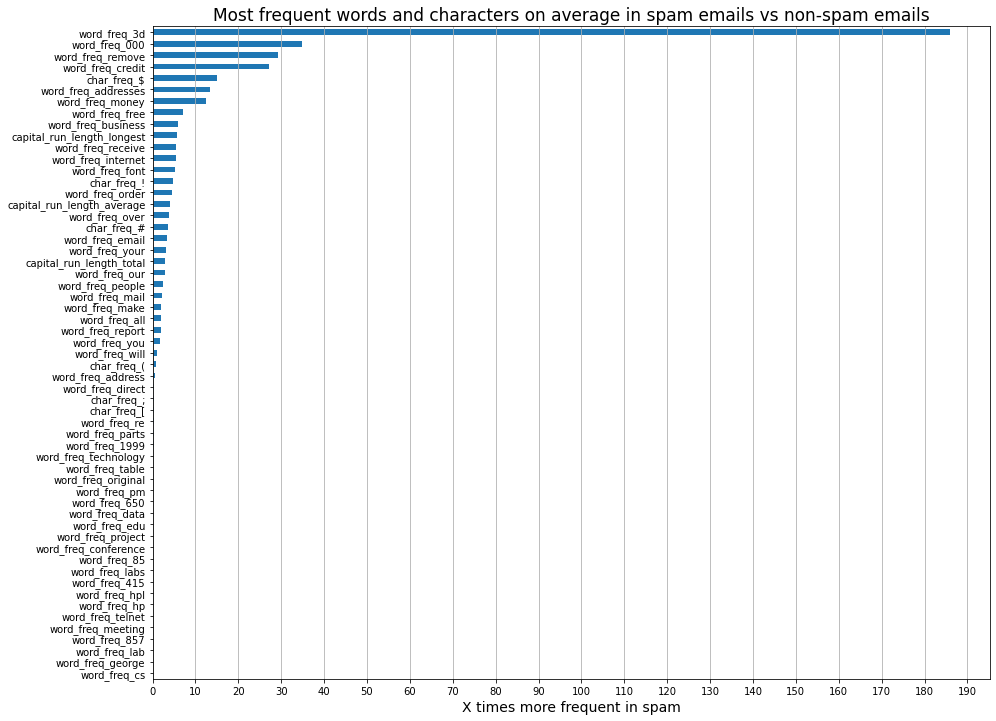

In [36]:
spambase_prop_1.sort_values(ascending=True).plot(kind='barh',figsize=(15,12))
plt.grid(axis='x')
plt.xlabel("X times more frequent in spam", fontsize=14)
plt.xticks(np.arange(min(spambase_prop_0), 200,10))
plt.title('Most frequent words and characters on average in spam emails vs non-spam emails',fontsize=17)
plt.show()

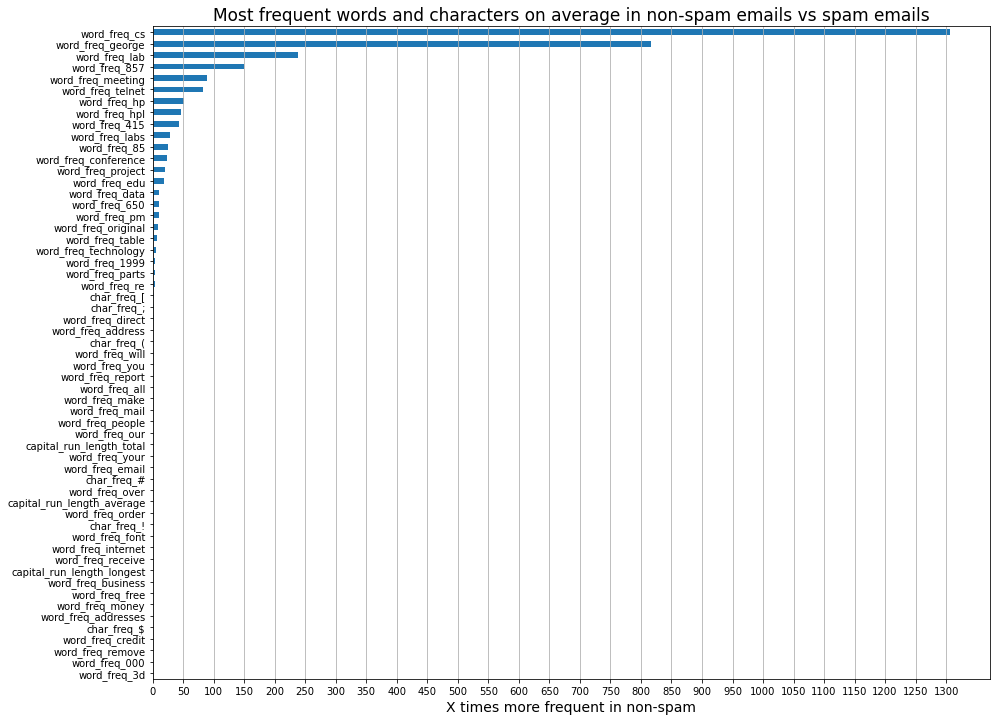

In [37]:
# same graph as above for the non-spam emails. Looks similar but for different words. 

spambase_prop_0.sort_values(ascending=True).plot(kind='barh',figsize=(15,12))
plt.xlabel("X times more frequent in non-spam", fontsize=14)
plt.title('Most frequent words and characters on average in non-spam emails vs spam emails',fontsize=17)
plt.xticks(np.arange(min(spambase_prop_0),max(spambase_prop_0),50))
plt.grid(axis='x')
plt.show()

#### Just for the most frequent word in each class, can we see how present they are?

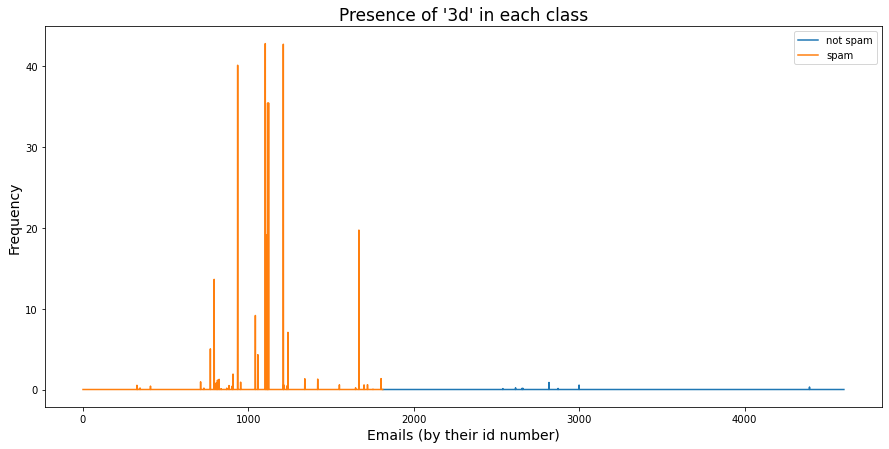

In [38]:
# '3d' is the most frequent word in spam emails
# Here we see its repartition in each class. It is barely present in non-spam emails. 
spambase.groupby('spam').word_freq_3d.plot(figsize=(15,7))
labels = ['not spam','spam']
plt.legend(labels)
plt.xlabel('Emails (by their id number)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title("Presence of '3d' in each class", fontsize=17)
plt.show()

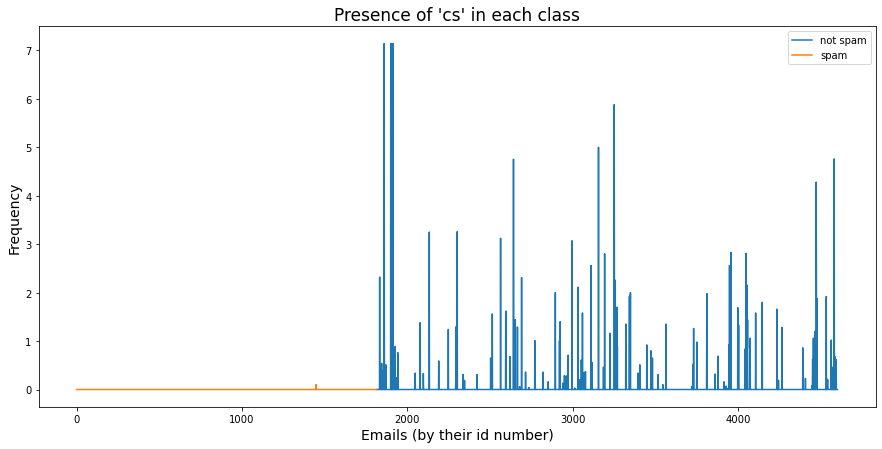

In [39]:
# 'cs' is the most frequent word in non-spam emails
# This is its repartition in each class. It's almost absent from spam emails. 
spambase.groupby('spam').word_freq_cs.plot(figsize=(15,7))
labels = ['not spam','spam']
plt.legend(labels)
plt.xlabel('Emails (by their id number)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title("Presence of 'cs' in each class", fontsize=17)
plt.show()

### Now we have a clearer sense of which features have a bigger impact on the nature of the emails. We will use that information later to simplify our models. But for now, let's focus on building prediction models for our data using all the features. 

## Models for spam prediction

#### We first create a dataframe that we'll use to record the balanced accuracy of our models both after the cross-validation and with the test data. We chose balanced accuracy as a metric because it takes into account the imbalance of the dataset.

#### We chose four models to work with: Random Forest, K-Nearest Neighbors, Gaussain Naive Bayes and K-Means. 

In [40]:
models_dict = {'RandomForest':[0.0,0.0],'KNeighbors':[0.0,0.0],'GaussianNB':[0.0,0.0], 'KMeans':[0.0,0.0]}
models_accs = ['CV_Bal_Accuracy','Test_Bal_Accuracy']

In [41]:
models_df = pd.DataFrame(data=models_dict, index=models_accs)
models_df

,RandomForest,KNeighbors,GaussianNB,KMeans
CV_Bal_Accuracy,0.0,0.0,0.0,0.0
Test_Bal_Accuracy,0.0,0.0,0.0,0.0


In [42]:
# Let's import all we need for our models (Random Forest, Naive Bayes, K-Nearest Neighbors, K-means): 
# the classifiers and the tools to split the data, use cross-validation, and evaluate the final performance 
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import balanced_accuracy_score

#### Split the data for training and testing 

In [43]:
# Define the target and the features separately
y = spambase.spam
X = spambase[spambase.columns.difference(['spam'])]  # excludes the column target 'spam'

###### We use 'stratify' to make  sure we maintain the relative proportions of our classes in the training and test sets, as our data is imbalanced. 
###### For the same reason, we use the balanced accuracy as a scoring method instead of the accuracy. 

In [44]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y,random_state=1, test_size=0.2, stratify=y)
print(Xtrain.shape, Xtest.shape, ytrain.shape, ytest.shape)

(3680, 57) (921, 57) (3680,) (921,)


### Random Forest 

In [45]:
def bal_acc_RF(n_estimators):
    """Returns the average balanced accuracy over 5 folds of a random forest model. 
    n_estimators: number of trees used in the forest 
    """
    model = RandomForestClassifier(n_estimators=n_estimators)  # nb of trees as argument 
    b_acc = cross_val_score(model, Xtrain, ytrain, scoring='balanced_accuracy').mean()
    return b_acc

In [46]:
# Let's determine the balanced accuracy for several values of n_estimators to find the best
keys_RF = [i for i in range(50,1000,100)]     # values for n_estimators (nb of tress)
values_RF = [bal_acc_RF(x) for x in keys_RF]  # values of balanced accuracy for each n_estimators
baccs_RF = dict(zip(keys_RF, values_RF))
print(baccs_RF)

{50: 0.9474779650533478, 150: 0.9463738982526675, 250: 0.9461326735735269, 350: 0.9472877686717179, 450: 0.9486670790165457, 550: 0.9491155095098189, 650: 0.948529457244472, 750: 0.9464945105922375, 850: 0.9479604144116284, 950: 0.9471671563321479}


In [47]:
# let's store the best balanced accuracy in our dataframe
best_acc_RF = max(values_RF)
best_acc_RF_tree_nb = max(baccs_RF, key=baccs_RF.get)  # the nb of trees giving the best performance
models_df.at['CV_Bal_Accuracy','RandomForest'] = best_acc_RF
print(best_acc_RF_tree_nb, best_acc_RF)
models_df

550 0.9491155095098189


,RandomForest,KNeighbors,GaussianNB,KMeans
CV_Bal_Accuracy,0.949116,0.0,0.0,0.0
Test_Bal_Accuracy,0.000000,0.0,0.0,0.0


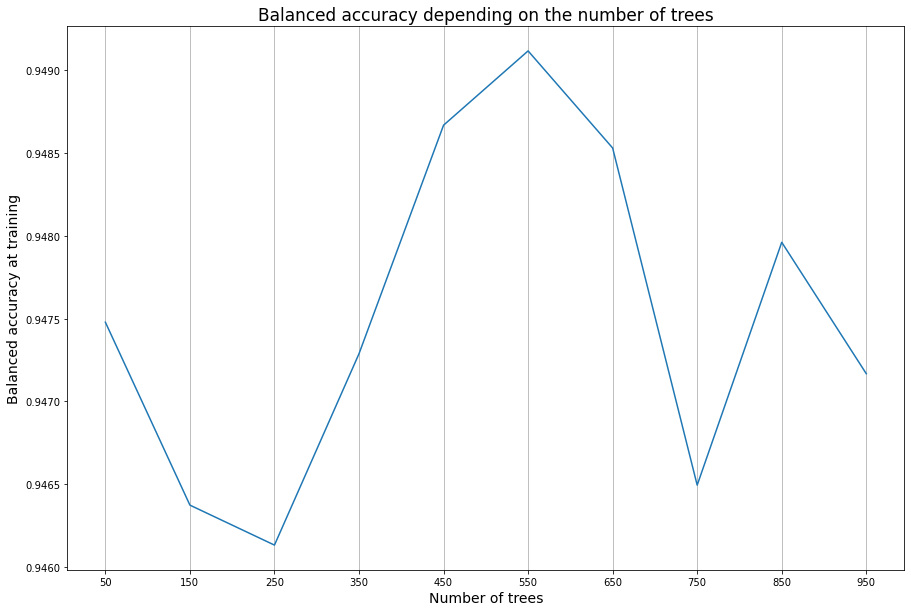

In [48]:
# let's plot the balanced accuracy for different numbers of trees in our random forest model
plt.figure(figsize=(15,10))
plt.plot(list(keys_RF), list(values_RF))
plt.xlabel("Number of trees",fontsize=14)
plt.ylabel("Balanced accuracy at training",fontsize=14)
plt.title("Balanced accuracy depending on the number of trees",fontsize=17)
plt.xticks(keys_RF) 
    # xticks allows us to see ticks for all the values of our independant variable
    # it is used by grid to diplay the grid lines
plt.grid(axis='x')

#### The graph allows us to clearly see where we have the best (highest) balanced accuracy. Let's now use the best hyperparameter n_estimators in our random forest model.
Also, notice that the actual performance (y-axis) varies little between all the values of n_estimators, even though the graph seems to show big variations. 

In [49]:
model_RF = RandomForestClassifier(n_estimators=best_acc_RF_tree_nb, random_state=1) 
    # we just define the number of trees used and use random_state for reproducibility 
model_RF.fit(Xtrain,ytrain)

RandomForestClassifier(n_estimators=550, random_state=1)

In [50]:
cross_val_score(model_RF, Xtrain, ytrain, cv=5, scoring='balanced_accuracy').mean()

0.9463738982526675

In [51]:
acc_test_rf = balanced_accuracy_score(ytest, model_RF.predict(Xtest))
acc_test_rf

0.9461328830830298

In [52]:
# store final accuracy in dataframe 
models_df.at['Test_Bal_Accuracy','RandomForest'] = acc_test_rf
models_df

,RandomForest,KNeighbors,GaussianNB,KMeans
CV_Bal_Accuracy,0.949116,0.0,0.0,0.0
Test_Bal_Accuracy,0.946133,0.0,0.0,0.0


### K-Nearest Neighbors

In [53]:
def bal_acc_knn(k_neighbors):
    """Returns average balanced accuracy over 5 folds of a k-nearest neighbors model.
    k_neighbors: number of neighbors to find to choose a point
    """
    model = KNeighborsClassifier(n_neighbors=k_neighbors)
    b_acc = cross_val_score(model, Xtrain, ytrain, scoring='balanced_accuracy').mean()
    return b_acc

In [54]:
# Determine balanced accuracy for several values of k
keys_knn = [i for i in range(1,11)]               # k values 
values_knn = [bal_acc_knn(x) for x in keys_knn]   # balanced accuracy  
baccs_knn = dict(zip(keys_knn,values_knn))
print(baccs_knn)

{1: 0.7946791402505026, 2: 0.7526581104066801, 3: 0.7863182310190197, 4: 0.7584304932735426, 5: 0.780714396165146, 6: 0.7620488634606463, 7: 0.7782140095871346, 8: 0.7582372042678213, 9: 0.7718169166537807, 10: 0.7597881552497293}


In [55]:
# store best accuracy in dataframe
models_df.at['CV_Bal_Accuracy','KNeighbors'] = max(values_knn)
best_acc_kneighbors = max(baccs_knn, key=baccs_knn.get)
print(best_acc_kneighbors, max(values_knn))
models_df

1 0.7946791402505026


,RandomForest,KNeighbors,GaussianNB,KMeans
CV_Bal_Accuracy,0.949116,0.794679,0.0,0.0
Test_Bal_Accuracy,0.946133,0.000000,0.0,0.0


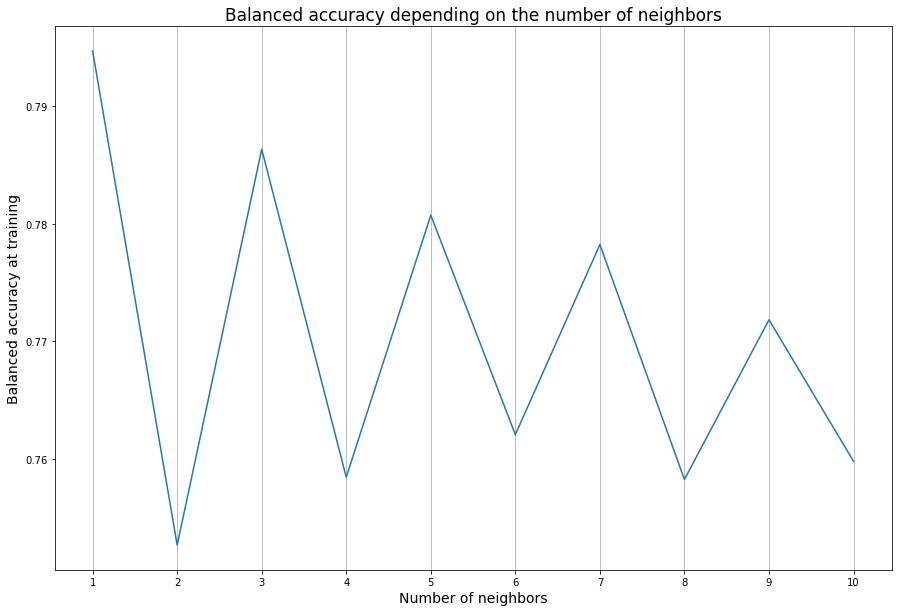

In [56]:
# let's visualise the balanced accuracy of our knn model on the training data depending on the value of n_neighbors
plt.figure(figsize=(15,10))
plt.plot(list(keys_knn), list(values_knn))
plt.xlabel("Number of neighbors",fontsize=14)
plt.ylabel("Balanced accuracy at training",fontsize=14)
plt.title("Balanced accuracy depending on the number of neighbors",fontsize=17)
plt.xticks(keys_knn)
plt.grid(axis='x')
plt.show()

#### The graphs show us that using 1 neighbor in the KNN algorithm gives the best balanced accuracy. Let's use this value in our KNN model. 

In [57]:
model_KNN = KNeighborsClassifier(n_neighbors=best_acc_kneighbors)  # we just define the number of neighbors to use
model_KNN.fit(Xtrain,ytrain)

KNeighborsClassifier(n_neighbors=1)

In [58]:
cross_val_score(model_KNN, Xtrain, ytrain, scoring='balanced_accuracy').mean() # we keep the default cv=5

0.7946791402505026

In [59]:
balanced_accuracy_score(ytest, model_KNN.predict(Xtest))

0.8068218845344945

In [60]:
models_df.at['Test_Bal_Accuracy','KNeighbors'] = balanced_accuracy_score(ytest, model_KNN.predict(Xtest))
models_df

,RandomForest,KNeighbors,GaussianNB,KMeans
CV_Bal_Accuracy,0.949116,0.794679,0.0,0.0
Test_Bal_Accuracy,0.946133,0.806822,0.0,0.0


### Gaussian Naive Bayes

In [61]:
model_GNB = GaussianNB()
model_GNB.fit(Xtrain, ytrain)

GaussianNB()

In [62]:
acc_cv_gnn = cross_val_score(model_GNB, Xtrain, ytrain, scoring='balanced_accuracy').mean()
acc_cv_gnn

0.8437467140869028

In [63]:
acc_test_gnn = balanced_accuracy_score(ytest, model_GNB.predict(Xtest))
acc_test_gnn

0.8429381794484434

In [64]:
models_df['GaussianNB'] = [acc_cv_gnn,acc_test_gnn]
models_df

,RandomForest,KNeighbors,GaussianNB,KMeans
CV_Bal_Accuracy,0.949116,0.794679,0.843747,0.0
Test_Bal_Accuracy,0.946133,0.806822,0.842938,0.0


#### The input data for our Naive Bayes model is expected to have a Gaussian distribution. Let's standardize the input data and see how the model performs.

In [65]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [66]:
model_GNB_St = GaussianNB()
model_GNB_St.fit(scaler.fit_transform(Xtrain), ytrain)

GaussianNB()

In [67]:
acc_cv_gnnst = cross_val_score(model_GNB_St, scaler.fit_transform(Xtrain), ytrain, scoring='balanced_accuracy').mean()
acc_cv_gnnst

0.8406942941085511

In [68]:
acc_test_gnnst = balanced_accuracy_score(ytest, model_GNB_St.predict(scaler.fit_transform(Xtest)))
acc_test_gnnst

0.8383245949228354

In [69]:
models_df['GaussianNB_St'] = [acc_cv_gnnst,acc_test_gnnst]
models_df

,RandomForest,KNeighbors,GaussianNB,KMeans,GaussianNB_St
CV_Bal_Accuracy,0.949116,0.794679,0.843747,0.0,0.840694
Test_Bal_Accuracy,0.946133,0.806822,0.842938,0.0,0.838325


#### It appears that standardizing the input for our Gaussian Naive Bayes model doesn't change much the quality of the predictions. Let's just keep the first model using the original data.

### K-means clustering
This model uses an algorithm of unsupervised learning. How well does it perform compared to the other models trained on data beforehand? 

In [70]:
model_KM = KMeans(n_clusters=2)  # we just define the number of classes (spam, not spam)
model_KM.fit(Xtrain)
# As it is an unsupervised learning algorithm, we don't need the label (scikit-learn would actually ignore it anyway)

KMeans(n_clusters=2)

In [71]:
# First evaluation of the performance. 
acc_cv_km = cross_val_score(model_KM, Xtrain, ytrain, scoring='balanced_accuracy').mean()
acc_cv_km

0.5433347298601608

In [72]:
acc_test_km = balanced_accuracy_score(ytest, model_KM.predict(Xtest))
acc_test_km

0.5411075565034509

In [73]:
models_df['KMeans'] = [acc_cv_km,acc_test_km]
models_df

,RandomForest,KNeighbors,GaussianNB,KMeans,GaussianNB_St
CV_Bal_Accuracy,0.949116,0.794679,0.843747,0.543335,0.840694
Test_Bal_Accuracy,0.946133,0.806822,0.842938,0.541108,0.838325


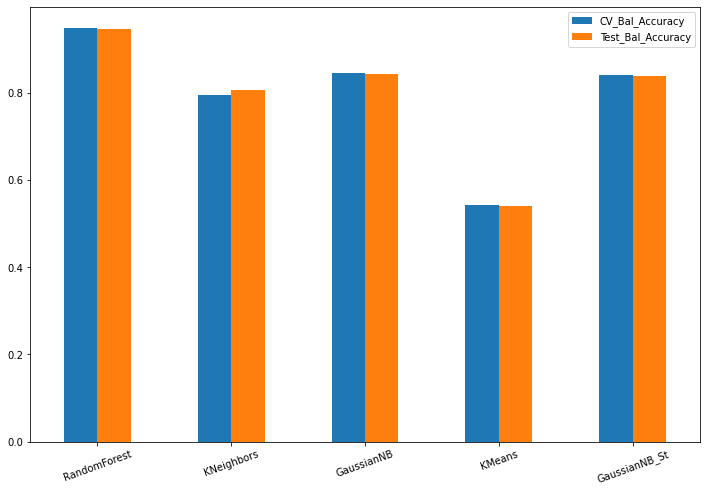

In [74]:
# Visualize the performance of our models after cross-validation and after comparison with test data
models_df.T.plot(kind='bar',figsize=(12,8), rot=20)
plt.show()

In [75]:
models_df

,RandomForest,KNeighbors,GaussianNB,KMeans,GaussianNB_St
CV_Bal_Accuracy,0.949116,0.794679,0.843747,0.543335,0.840694
Test_Bal_Accuracy,0.946133,0.806822,0.842938,0.541108,0.838325


### Visually comparing our models, we can see that the most accurate model on our data is the random forest model. Looking at the numerical data from the dataframe, we see indeed a balanced accuracy of nearly 95% on our spam data, a very good score. 

### The K-means model is the least performant, which may not be too surprising as it is a model of unsupervised learning. Therefore, it didn't use the knowledge of the class in the training data, it simplfy tried to group data points together based solely on their numerical attributes. At least on this dataset, it underperformed compared our other models. 

### Meanwhile, the Naive Bayes and k-nearest neighbors models achieved a rather good outcome, respectively 84% and 80% on the balanced accuracy. 

#### Now we can fit the models to the entire dataset to potentially use them on new data. Indeed, the purpose of the cross-validation step we used was to allow us to fine-tune the hyperparameters with the goal to improve the model's performance. Once we have the best model, we can feed it the entire dataset as more data often leads to better results. And the test data would just be wasted if we didn't use it. 

In [76]:
model_GNB.fit(X,y)
model_KNN.fit(X,y)
model_RF.fit(X,y)
model_KM.fit(X,y)

KMeans(n_clusters=2)

### Remember that we found earlier what features had the biggest impact on the target class. Let's pick a few of the most frequent features in each class and use them with a random forest model to see the difference in performance. 
As a reminder, here are the graphs showing the most frequent words and charactes for each class: 

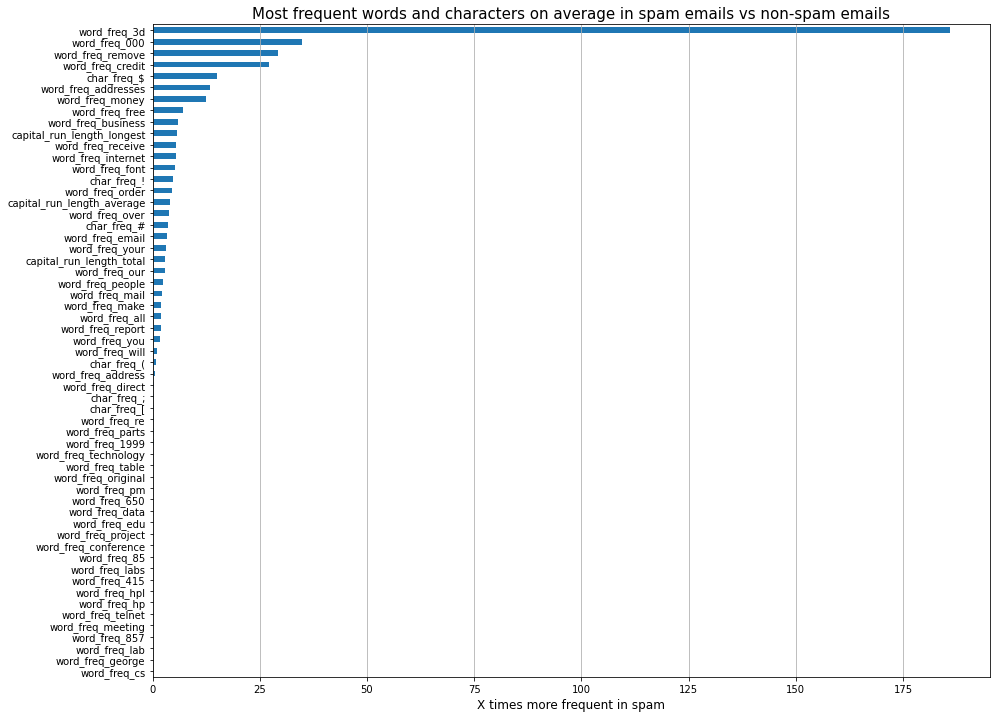

In [77]:
spambase_prop_1.sort_values(ascending=True).plot(kind='barh',figsize=(15,12))
plt.grid(axis='x')
plt.xlabel("X times more frequent in spam", fontsize=12)
plt.title('Most frequent words and characters on average in spam emails vs non-spam emails',fontsize=15)
plt.show()

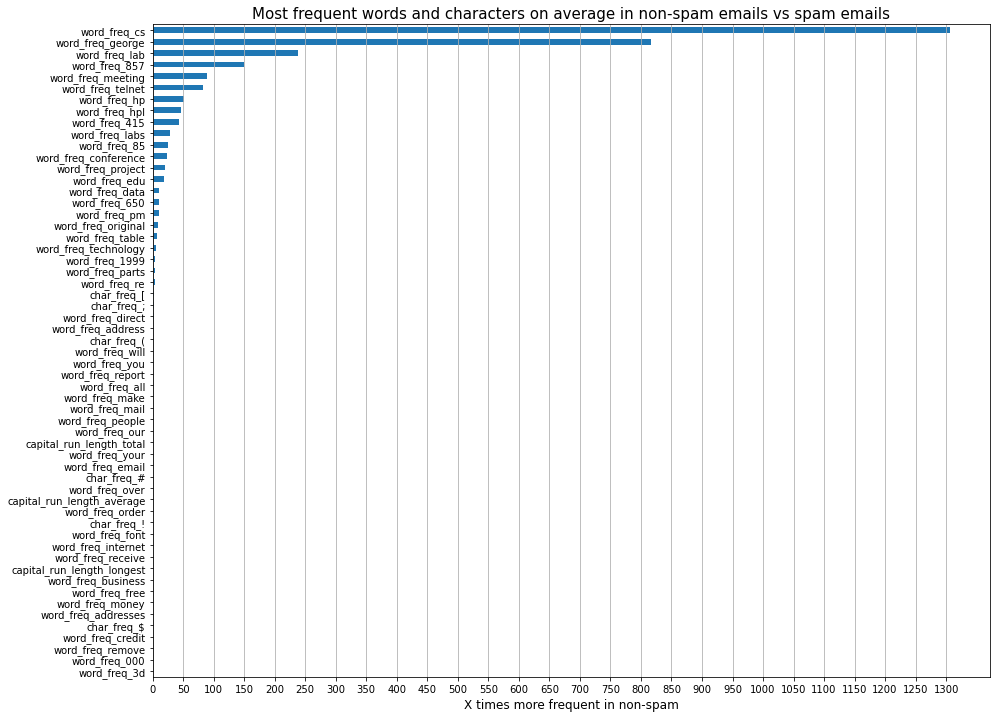

In [78]:
# same graph as above for the non-spam emails. Looks similar but for different words. 

spambase_prop_0.sort_values(ascending=True).plot(kind='barh',figsize=(15,12))
plt.xlabel("X times more frequent in non-spam", fontsize=12)
plt.title('Most frequent words and characters on average in non-spam emails vs spam emails',fontsize=15)
plt.xticks(np.arange(min(spambase_prop_0),max(spambase_prop_0),50))
plt.grid(axis='x')
plt.show()

#### The words and characters (~features) we choose are 3d, 000, remove, credit, $, addresses, money for spam emails ; cs, george, lab, 857, meeting, telnet, hp, hpl, 415 for non-spam emails and the three features about uppercase letters in emails as they provide different information. 

In [79]:
cut_features = ['word_freq_3d','word_freq_000','word_freq_remove','word_freq_credit','char_freq_$','word_freq_addresses','word_freq_money','word_freq_cs','word_freq_george','word_freq_lab','word_freq_857','word_freq_meeting','word_freq_telnet','word_freq_hp','word_freq_hpl','word_freq_415','capital_run_length_average','capital_run_length_longest','capital_run_length_total']
cut_features

['word_freq_3d',
 'word_freq_000',
 'word_freq_remove',
 'word_freq_credit',
 'char_freq_$',
 'word_freq_addresses',
 'word_freq_money',
 'word_freq_cs',
 'word_freq_george',
 'word_freq_lab',
 'word_freq_857',
 'word_freq_meeting',
 'word_freq_telnet',
 'word_freq_hp',
 'word_freq_hpl',
 'word_freq_415',
 'capital_run_length_average',
 'capital_run_length_longest',
 'capital_run_length_total']

In [80]:
len(cut_features)

19

In [81]:
# Our reduced dataset
X_cut = X[cut_features]
X_cut.shape

(4601, 19)

In [82]:
# Model training
Xtrain_cut, Xtest_cut, ytrain, ytest = train_test_split(X_cut,y,stratify=y, random_state=1, test_size=0.2)
Xtrain_cut.shape,Xtest_cut.shape

((3680, 19), (921, 19))

In [83]:
def bal_acc_RF_cut(n_estimators):
    """Returns the average balanced accuracy over 5 folds of a random forest model. 
    n_estimators: number of trees used in the forest 
    """
    model = RandomForestClassifier(n_estimators=n_estimators)
    b_acc = cross_val_score(model, Xtrain_cut, ytrain, scoring='balanced_accuracy').mean()
    return b_acc

In [84]:
# Determine the balanced accuracy for different values of the n_estimators model parameter 
keys_RF_cut = [i for i in range(50,1000,100)]
values_RF_cut = [bal_acc_RF_cut(x) for x in keys_RF_cut]
baccs_RF_cut = dict(zip(keys_RF_cut, values_RF_cut))
print(baccs_RF_cut)

{50: 0.9245430647904748, 150: 0.9276295036338332, 250: 0.9283361682387505, 350: 0.9275259007267666, 450: 0.9262672027215093, 550: 0.9271810731405598, 650: 0.9278537188804702, 750: 0.9248878923766816, 850: 0.926956857893923, 950: 0.9267156332147828}


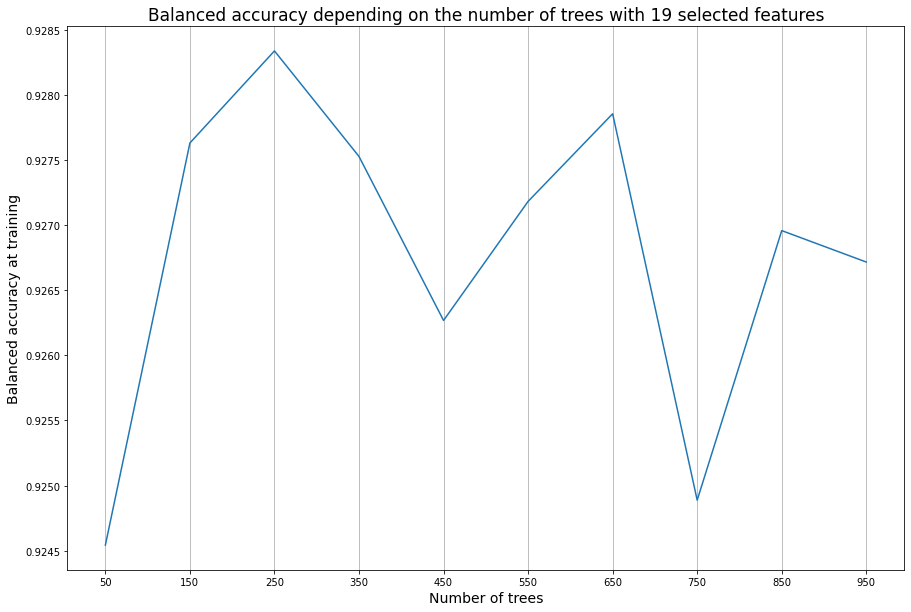

In [85]:
# let's plot the balanced accuracy for different numbers of trees in our random forest model
plt.figure(figsize=(15,10))
plt.plot(list(keys_RF_cut), list(values_RF_cut))
plt.xlabel("Number of trees",fontsize=14)
plt.ylabel("Balanced accuracy at training",fontsize=14)
plt.title("Balanced accuracy depending on the number of trees with 19 selected features",fontsize=17)
plt.xticks(keys_RF_cut) 
    # xticks allows us to see ticks for all the values of our independant variable
    # it is used by grid to diplay the grid lines
plt.grid(axis='x')

In [86]:
# Find the best best balanced accuracy and the n_estimators parameter associated. 
best_acc_RF_cut = max(values_RF_cut)
best_acc_RF_tree_nb_cut = max(baccs_RF_cut, key=baccs_RF_cut.get)  # the nb of trees giving the best performance
print(best_acc_RF_tree_nb_cut, best_acc_RF_cut)

250 0.9283361682387505


In [87]:
model_RF_cut = RandomForestClassifier(n_estimators=best_acc_RF_tree_nb_cut, random_state=1) 
    # we just define the number of trees used and use random_state for reproducibility 
model_RF_cut.fit(Xtrain_cut,ytrain)

RandomForestClassifier(n_estimators=250, random_state=1)

In [88]:
cross_val_score(model_RF_cut, Xtrain_cut, ytrain, scoring='balanced_accuracy').mean()

0.9267156332147828

In [89]:
acc_test_rf_cut = balanced_accuracy_score(ytest, model_RF_cut.predict(Xtest_cut))
acc_test_rf_cut

0.9103720489350988

### As we can see, with just a third of the features we still get a balanced accuracy of over 90%. This is very good, makes our model lighter and uses less resources. 
 

In [90]:
models_df['RandomForest19'] = [best_acc_RF_cut, acc_test_rf_cut]
models_df

,RandomForest,KNeighbors,GaussianNB,KMeans,GaussianNB_St,RandomForest19
CV_Bal_Accuracy,0.949116,0.794679,0.843747,0.543335,0.840694,0.928336
Test_Bal_Accuracy,0.946133,0.806822,0.842938,0.541108,0.838325,0.910372


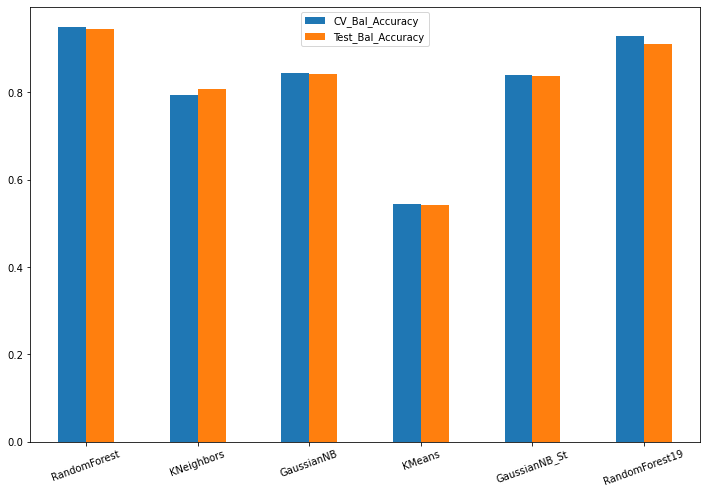

In [91]:
# Visualize the performance of our models after cross-validation and after comparison with test data
models_df.T.plot(kind='bar',figsize=(12,8), rot=20)
plt.show()

### As the graph shows, our random forest model with fewer features performs slightly below our full random forest model but outperforms all the other models. 

In [92]:
models_df

,RandomForest,KNeighbors,GaussianNB,KMeans,GaussianNB_St,RandomForest19
CV_Bal_Accuracy,0.949116,0.794679,0.843747,0.543335,0.840694,0.928336
Test_Bal_Accuracy,0.946133,0.806822,0.842938,0.541108,0.838325,0.910372


### Efficiency 

#### Let's use %timeit to compare the time both random forests take at cross-validation (trying several values to find the best), at model building and at prediction. We'll copy and time the snippets of code from earlier for these steps of our random forest models. 

###### Calculation of balanced accuracy with cross-validation for several values 

In [ ]:
%timeit values_RF = [bal_acc_RF(x) for x in keys_RF]  # values of balanced accuracy for each n_estimators

In [ ]:
%timeit values_RF_cut = [bal_acc_RF_cut(x) for x in keys_RF_cut]

###### Model building and fitting 

In [ ]:
%%timeit 

model_RF = RandomForestClassifier(n_estimators=best_acc_RF_tree_nb, random_state=1) 
    # we just define the number of trees used and use random_state for reproducibility 
model_RF.fit(Xtrain,ytrain)

In [ ]:
%%timeit

model_RF_cut = RandomForestClassifier(n_estimators=best_acc_RF_tree_nb_cut, random_state=1) 
    # we just define the number of trees used and use random_state for reproducibility 
model_RF_cut.fit(Xtrain_cut,ytrain)

###### Final performance estimation 

In [ ]:
%timeit balanced_accuracy_score(ytest, model_RF.predict(Xtest))

In [ ]:
%timeit balanced_accuracy_score(ytest, model_RF_cut.predict(Xtest_cut))

### With one third of the features, all the operations above end up being faster, taking between 40% and 65% of the time taken by the full model. In a real-world setting where we could have much more data and many more features, this could make enormous difference in efficiency. 
### Other steps to further improve the efficiency of our code include running code in parallel and using scikit-learn modules that could do some steps of this work more efficiently. 